## Creating CNN Using Transfer Learning (RestNet50)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'


In [5]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Train/*')

In [8]:
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 219s 16s/step - loss: 5.3925 - accuracy: 0.5156 - val_loss: 10.1093 - val_accuracy: 0.3209
Epoch 2/50
13/13 [==============================] - 6s 423ms/step - loss: 4.9811 - accuracy: 0.4696 - val_loss: 0.9724 - val_accuracy: 0.3582
Epoch 3/50
13/13 [==============================] - 6s 424ms/step - loss: 1.7290 - accuracy: 0.5023 - val_loss: 1.6921 - val_accuracy: 0.3507
Epoch 4/50
13/13 [==============================] - 6s 425ms/step - loss: 0.8724 - accuracy: 0.5555 - val_loss: 1.2946 - val_accuracy: 0.3731
Epoch 5/50
13/13 [==============================] - 6s 423ms/step - loss: 0.7636 - accuracy: 0.5747 - val_loss: 0.7578 - val_accuracy: 0.4552
Epoch 6/50
13/13 [==============================] - 6s 424ms/step - loss: 0.7915 - accuracy: 0.5644 - val_loss: 0.6114 - val_accuracy: 0.5896
Epoch 7/50
13/13 [==============================] - 6s 426ms/step - loss: 0.6376 - accuracy: 0.6722 - val_loss: 1.1026 - val_accuracy: 0.3881
Epoch

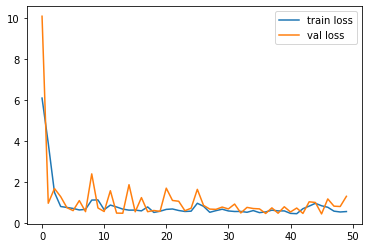

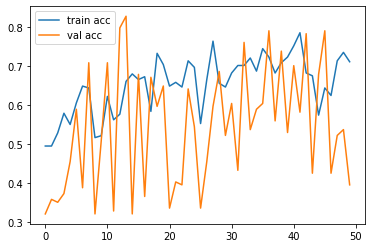

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet.h5')

In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[0.02272522, 0.9772748 ],
       [0.05556525, 0.9444347 ],
       [0.0398281 , 0.9601719 ],
       [0.16138259, 0.83861744],
       [0.05002967, 0.94997036],
       [0.76332647, 0.23667361],
       [0.22088505, 0.77911496],
       [0.10813908, 0.8918609 ],
       [0.37133008, 0.6286699 ],
       [0.5091195 , 0.49088052],
       [0.3544943 , 0.6455057 ],
       [0.01788897, 0.98211104],
       [0.07236815, 0.92763186],
       [0.4134286 , 0.5865714 ],
       [0.06990497, 0.930095  ],
       [0.34828624, 0.6517138 ],
       [0.01670611, 0.9832939 ],
       [0.16823967, 0.8317603 ],
       [0.60549426, 0.3945057 ],
       [0.01677297, 0.983227  ],
       [0.06025774, 0.9397422 ],
       [0.59209704, 0.40790302],
       [0.11958446, 0.88041556],
       [0.02809524, 0.97190475],
       [0.30858922, 0.6914108 ],
       [0.19366546, 0.80633456],
       [0.1157664 , 0.8842336 ],
       [0.49080843, 0.5091916 ],
       [0.09144878, 0.9085512 ],
       [0.09200967, 0.9079904 ],
       [0.

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_resnet.h5')

In [35]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [36]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [37]:
x.shape

(224, 224, 3)

In [38]:
x=x/255

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
model.predict(img_data)

array([[9.999044e-01, 9.555540e-05]], dtype=float32)

In [41]:
a=np.argmax(model.predict(img_data), axis=1)

In [43]:
a

array([0])

In [42]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
